# Veri Bilimi ve Makine Öğrenmesi Giriş Dersi Final Proje Ödevine Hoşgeldiniz ! 

# İçindekiler

* [Veri Çerçevesi Tanıtımı](#1)
    * [Gerekli Kütüphaneler](#2)
* [Keşifçi Veri Analizi](#3)
    * [Özniteliklerin incelenmesi ](#4)
    * [Dağılımların incelenmesi](#5)
    * [İstatiksel verilerin incelenmesi ](#6)
    * [Hedef Değişkenin incelenmesi](#7)
    * [Korelasyon](#8)
* [Ön işleme ve Eksik verilerin tamamlanması](#9)
    * [Aykırı Veriler](#10)
    * [Kategorik değerlere dönüştürme](#11)
* [Modellerin oluşturulması ve eğitilmesi](#12) 
    * [GaussianNB](#13) 
    * [Desicion tree ](#14) 
    * [KNN](#15) 

### Gerekli kütüphaneler <a id="2"> </a>

In [1]:
#Gerekli kütüphaneleri yüklemekle başlayalım. 

import numpy as np
import pandas as pd
import seaborn as sns
import missingno   
import matplotlib.pyplot as plt 
from sklearn import preprocessing   
from warnings import filterwarnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

filterwarnings('ignore')

sns.set(rc={'figure.figsize':(10,8)})

df = pd.read_csv("tablet.csv").copy()

### Örnek 5 veri

In [2]:
df.sample(5) 

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1051,551,Var,2.8,Yok,0.0,Var,54,0.1,172,7,15,169,1916,1414.0,19,Var,Yok,Var,Çok Ucuz,Yeşil
1781,1565,Var,0.5,Yok,0.0,Yok,38,0.1,121,5,1,781,1364,308.0,7,Var,Var,Var,Çok Ucuz,Beyaz
741,528,Yok,1.7,Yok,12.0,Var,6,0.8,142,2,15,574,637,3256.0,6,Var,Var,Yok,Normal,Pembe
1810,1029,Var,1.9,Var,5.0,Var,5,0.2,171,5,8,264,956,582.0,4,Var,Var,Var,Çok Ucuz,Mor
133,1970,Yok,1.6,Var,11.0,Var,58,0.3,80,8,19,654,882,2372.0,2,Var,Var,Yok,Normal,Turkuaz


### Veri seti bilgileri

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

In [4]:
print("Gözlem sayımız : ", df.shape[0])
print("Öznitelik sayımız: ",df.shape[1])

Gözlem sayımız :  2000
Öznitelik sayımız:  20


In [5]:
df.isnull().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

In [6]:
df["Bluetooth"].unique()

array(['Yok', 'Var'], dtype=object)

In [7]:
df["CiftHat"].unique()

array(['Yok', 'Var'], dtype=object)

In [8]:
df["4G"].unique()

array(['Yok', 'Var'], dtype=object)

In [9]:
df["3G"].unique()

array(['Var', 'Yok'], dtype=object)

In [10]:
df["Dokunmatik"].unique()

array(['Yok', 'Var'], dtype=object)

In [11]:
df["WiFi"].unique()

array(['Yok', 'Var'], dtype=object)

In [12]:
df["FiyatAraligi"].unique()

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [13]:
df["Renk"].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

##  Eksik Verilerin Tamamlanması <a id="9"> </a>


In [14]:
df.isnull().sum().sum()

17

In [15]:
df.isnull().sum() 

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Verisetimizin RAM özniteliği eksik olan 12 adet, ön kamera bilgisi girilmemiş olan 5 adet eksik gözlemi mevcut. 

In [16]:
df[df["OnKameraMP"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz,Sarı
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz,Siyah


In [17]:
df.groupby("FiyatAraligi")["OnKameraMP"].mean()

FiyatAraligi
Normal      4.498000
Pahalı      4.316000
Ucuz        4.340000
Çok Ucuz    4.092929
Name: OnKameraMP, dtype: float64

In [18]:
NaN_onKamera = df[df["OnKameraMP"].isnull()].index
NaN_onKamera

Int64Index([351, 726, 792, 1416, 1641], dtype='int64')

In [19]:
df.loc[NaN_onKamera ,"OnKameraMP"] = 4 

In [20]:
df[df["RAM"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu
961,1949,Yok,1.3,Var,0.0,Yok,23,0.1,101,5,1,839,1136,NaN,20,Var,Yok,Yok,Pahalı,Sarı
965,1786,Yok,1.2,Yok,11.0,Yok,61,0.1,123,3,14,74,865,NaN,17,Yok,Var,Yok,Pahalı,Kahverengi
1180,1369,Var,1.8,Var,6.0,Yok,34,0.5,162,1,7,553,727,NaN,18,Yok,Var,Var,Pahalı,Turuncu


In [21]:
df.groupby("FiyatAraligi")["RAM"].mean()

FiyatAraligi
Normal      2582.81600
Pahalı      3449.35041
Ucuz        1679.49000
Çok Ucuz     785.31400
Name: RAM, dtype: float64

In [22]:
bos_olan_ram= df[df["RAM"].isnull()].index
bos_olan_ram

Int64Index([87, 169, 310, 329, 658, 777, 871, 961, 965, 1180, 1779, 1804], dtype='int64')

In [23]:
df.loc[bos_olan_ram ,"RAM"] = 3450 

In [24]:
df.isnull().sum().sum()

0

### Aykırı veriler <a id="10"> </a>

Yukarıda bazı özniteliklerin dağılımına bakıp boxplotlarını çizdirmiştik. Bu grafiklerden gördüğümüz üzere 3 farklı özniteliğimizde aykırı veriler bulunuyor.Bunlar;
* OnKameraMP
* CozunurlukYükseklik
* ArkaKameraMp

### OnKameraMp

<Axes: >

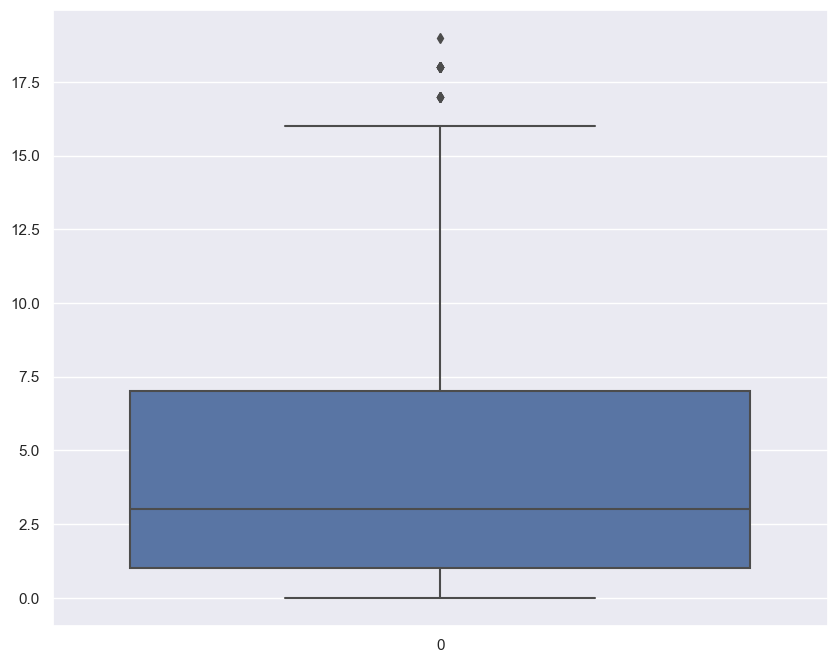

In [25]:
sns.boxplot(df["OnKameraMP"])

In [26]:
Q1 = df["OnKameraMP"].quantile(0.25) 
Q2 = df["OnKameraMP"].quantile(0.5) 
Q3 = df["OnKameraMP"].quantile(0.75)
Q4 = df["OnKameraMP"].quantile(1)

IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [27]:
print("Q1 ->", Q1)
print("Q3 ->", Q3)
print("Q2 ->", Q2)
print("Q4 ->", Q4)
print("IQR ->", IQR)

print()

print("Alt sınır: ", alt_sinir)
print("Üst sınır: ", ust_sinir)



Q1 -> 1.0
Q3 -> 7.0
Q2 -> 3.0
Q4 -> 19.0
IQR -> 6.0

Alt sınır:  -8.0
Üst sınır:  16.0


In [28]:
outliers_df = df[(df["OnKameraMP"] < alt_sinir) | (df["OnKameraMP"] > ust_sinir)]
outliers_df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
246,1708,Var,2.4,Var,18.0,Var,49,0.1,109,1,19,233,517,3388.0,16,Var,Var,Var,Pahalı,Turkuaz
397,1290,Var,1.4,Var,19.0,Var,35,0.3,110,4,20,405,742,879.0,8,Var,Yok,Yok,Çok Ucuz,Siyah
401,1957,Yok,1.2,Var,18.0,Var,36,0.8,151,2,19,1194,1727,1115.0,18,Var,Yok,Var,Ucuz,Turuncu
513,1703,Var,1.5,Var,17.0,Var,55,0.7,138,5,19,1411,1711,2993.0,20,Var,Var,Var,Pahalı,Yeşil
642,591,Yok,2.1,Var,18.0,Var,16,0.5,196,7,20,952,1726,704.0,4,Var,Var,Var,Çok Ucuz,Kırmızı
661,946,Var,2.6,Var,17.0,Yok,5,0.1,166,3,20,1698,1771,3720.0,4,Yok,Var,Yok,Pahalı,Kırmızı
867,1772,Var,1.6,Yok,17.0,Var,45,0.5,159,2,18,837,1405,1146.0,17,Var,Var,Yok,Ucuz,Turkuaz
896,1448,Yok,0.5,Var,18.0,Yok,2,0.2,100,5,19,846,1144,593.0,18,Var,Var,Var,Çok Ucuz,Turkuaz
920,1348,Yok,2.0,Yok,18.0,Yok,52,0.3,98,3,20,1869,1942,955.0,7,Var,Var,Var,Ucuz,Mavi
975,1937,Var,1.7,Yok,17.0,Yok,58,0.6,189,1,19,1728,1767,3321.0,14,Var,Var,Yok,Pahalı,Kahverengi


<Axes: >

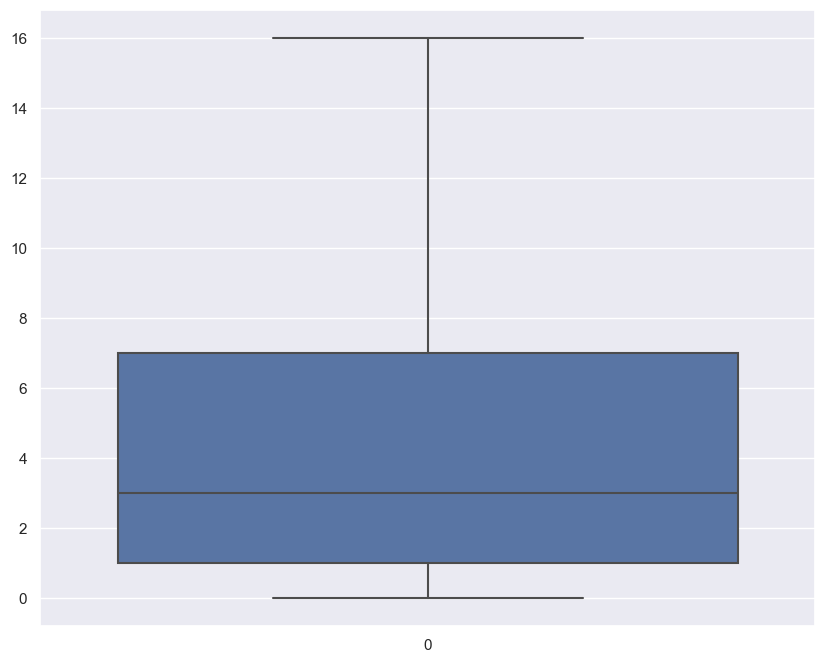

In [29]:
OnKameraMp = df['OnKameraMP']
ust_aykiri_veriler = (OnKameraMp > ust_sinir)
OnKameraMp[ust_aykiri_veriler] = ust_sinir
sns.boxplot(df["OnKameraMP"])


### CozunurlukYukseklik

<Axes: >

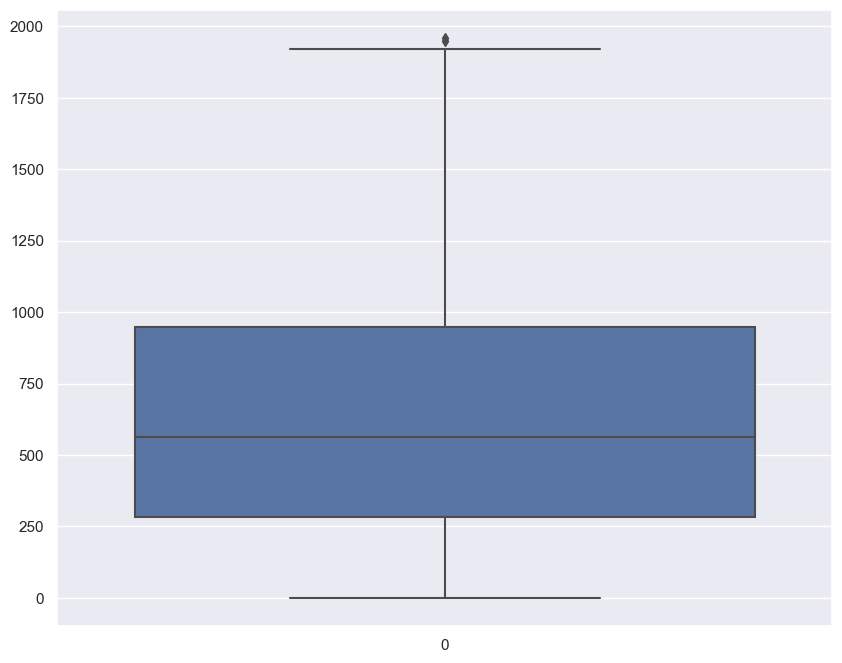

In [30]:
sns.boxplot(df["CozunurlukYükseklik"]) ## çözünürlükte 0 değeri var

Çözünürlük yükseklik 0 olamaz

In [31]:
df.drop(df.index[df["CozunurlukYükseklik"]== 0], inplace=True)

In [32]:
Q1 = df["CozunurlukYükseklik"].quantile(0.25) 
Q2 = df["CozunurlukYükseklik"].quantile(0.5) 
Q3 = df["CozunurlukYükseklik"].quantile(0.75)
Q4 = df["CozunurlukYükseklik"].quantile(1)

IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

print("Q1 ->", Q1)
print("Q3 ->", Q3)
print("Q2 ->", Q2)
print("Q4 ->", Q4)
print("IQR ->", IQR)

print()

print("Alt sınır: ", alt_sinir)
print("Üst sınır: ", ust_sinir)

Q1 -> 284.0
Q3 -> 947.75
Q2 -> 565.5
Q4 -> 1960.0
IQR -> 663.75

Alt sınır:  -711.625
Üst sınır:  1943.375


In [33]:
outliers_df = df[(df["CozunurlukYükseklik"] < alt_sinir) | (df["CozunurlukYükseklik"] > ust_sinir)]
outliers_df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1115,1413,Var,0.5,Var,4.0,Var,45,0.4,104,5,6,1949,1994,2973.0,15,Var,Yok,Var,Pahalı,Kırmızı
1820,1230,Var,1.6,Yok,0.0,Var,48,0.7,111,7,2,1960,1963,1622.0,16,Var,Var,Var,Normal,Yeşil


<Axes: >

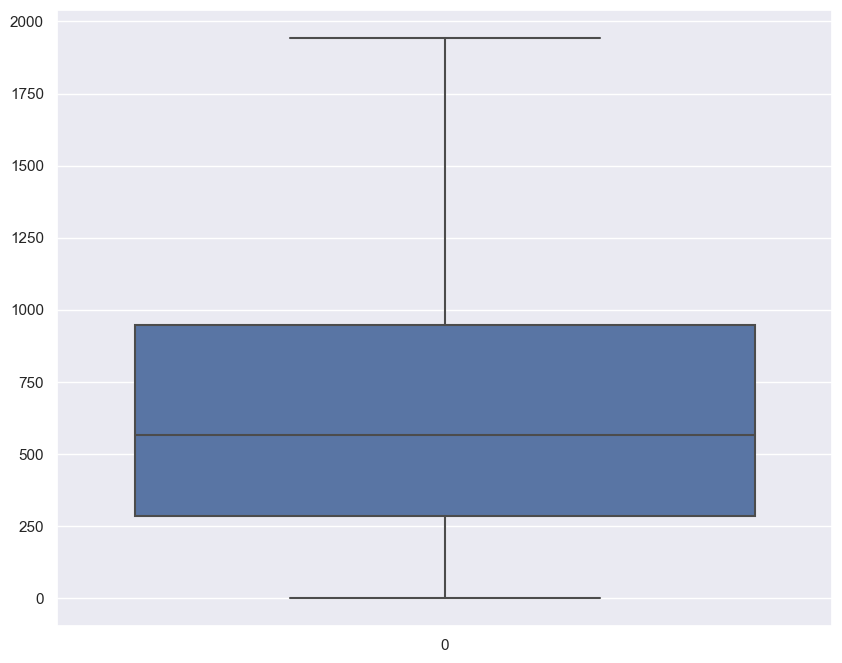

In [34]:
CozunurlukYukseklik = df['CozunurlukYükseklik']
ust_aykiri_veriler = (CozunurlukYukseklik > ust_sinir)
CozunurlukYukseklik[ust_aykiri_veriler] = ust_sinir
sns.boxplot(df["CozunurlukYükseklik"])

### Kategorik değerlere dönüştürme   <a id="11"> </a>

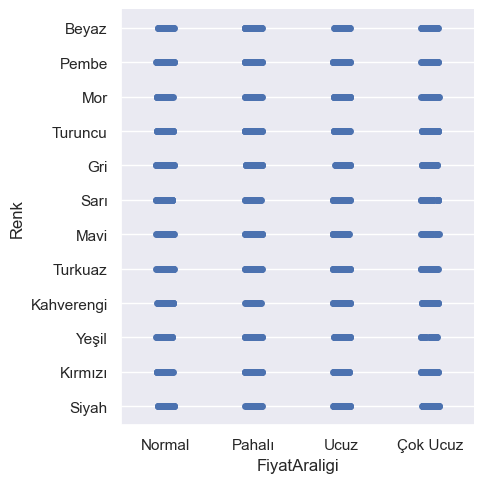

In [35]:
sns.catplot(x="FiyatAraligi", y="Renk",data = df)

Renklerin fiyat aralığına bir etkisi olmadığını gördük. Bu yüzden renk özniteliğini çıkartabiliriz.

In [36]:
df.drop('Renk', inplace=True, axis=1)

In [37]:
label_encoder = preprocessing.LabelEncoder()
df['Bluetooth'] = label_encoder.fit_transform(df['Bluetooth'])
df['CiftHat'] = label_encoder.fit_transform(df['CiftHat'])
df['4G'] = label_encoder.fit_transform(df['4G'])
df['3G'] = label_encoder.fit_transform(df['3G'])
df['Dokunmatik'] = label_encoder.fit_transform(df['Dokunmatik'])
df['WiFi'] = label_encoder.fit_transform(df['WiFi'])
df['FiyatAraligi'] = label_encoder.fit_transform(df['FiyatAraligi'])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499.0,695,2328.0,2,0,1,1,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259.0,1040,3863.0,9,0,0,0,1
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593.0,732,1734.0,14,1,1,0,2
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285.0,1462,3615.0,6,0,1,0,1
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330.0,1686,2391.0,3,0,0,0,0


## Modellerin oluşturulması ve eğitilmesi <a id="12"> </a>

In [38]:
y = df['FiyatAraligi']
X = df.drop(['FiyatAraligi'], axis=1)
  

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)
                                                    

### Desicion tree <a id="14"> </a>

In [40]:
cart = DecisionTreeClassifier(random_state = 42,criterion="entropy")
cart_model = cart.fit(X_train, y_train)

In [41]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.838

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       126
           1       0.88      0.81      0.84       121
           2       0.79      0.84      0.82       119
           3       0.92      0.87      0.90       134

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



Normal -> 0

Pahalı -> 1

Ucuz -> 2

Çok Ucuz -> 3

Yok -> 1
Var -> 0

In [43]:
BataryaGucu = 2500
Bluetooth = 1
MikroislemciHizi = 2.2
CiftHat = 0
OnKameraMp = 5
DortG = 0
DahiliBellek = 32
Kalinlik = 0.9
Agirlik = 120
CekirdekSayisi = 4
ArkaKameraMp = 12
CozunurlukYükseklik = 900
CozunurlukGenislik = 1200
RAM = 3000
BataryaOmru = 12
UcG = 0
Dokunmatik = 0
WiFi = 0
cart_model.predict([[BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMp,DortG,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMp,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,UcG,Dokunmatik,WiFi]])

array([0])

In [44]:
test = pd.DataFrame(X_test).copy() 
test["fiyatAraligi"] = y_test
test["predicted_fiyatAraligi"] = y_pred
test.sample(5)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,fiyatAraligi,predicted_fiyatAraligi
1442,689,1,1.4,1,2.0,1,45,0.5,103,5,11,256.0,823,3585.0,10,0,1,1,1,0
310,1479,0,1.8,0,0.0,0,24,0.1,146,6,0,327.0,645,3450.0,5,0,1,1,1,1
1819,1445,0,2.4,0,7.0,0,20,0.4,173,7,15,1273.0,1345,1441.0,13,0,0,0,2,2
1443,531,0,0.5,0,0.0,0,12,0.5,121,4,3,158.0,1657,2331.0,20,0,1,0,2,2
1435,956,1,0.5,1,1.0,0,41,1.0,143,7,6,511.0,1075,3286.0,12,0,0,1,1,1


In [45]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)
cross_val_score(cart_model, X_test, y_test, cv = 10).mean()

[[104  13   9   0]
 [ 23  98   0   0]
 [  9   0 100  10]
 [  0   0  17 117]]


0.784

In [46]:
cart_grid = {"max_depth": range(1,20),
            "min_samples_split" : range(2,100)}
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 3, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)
print("En iyi parametreler : " + str(cart_cv_model.best_params_))
print("En iyi skor : " + str(cart_cv_model.best_score_))

Fitting 3 folds for each of 1862 candidates, totalling 5586 fits
[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=12; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=13; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=15; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=18; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=18; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=22; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=22; total time=   0.0s
[CV] END ..................max_depth=1, min_

[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=5; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=6; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=8; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=10; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=11; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=14; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=15; total time=   0.0s
[CV] END ..................m

[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=47; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=47; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=48; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=48; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=82; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=82; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=82; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=83; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=83; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=83; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=84; total time=   0.0s
[CV] END ..................m

[CV] END ..................max_depth=6, min_samples_split=29; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=30; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=30; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=30; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=31; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=31; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=31; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=32; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=32; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=32; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=33; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=33; total time=   0.0s
[CV] END ..................m

[CV] END .................max_depth=11, min_samples_split=53; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=53; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=54; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=54; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=54; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=83; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=84; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=84; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=93; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=93; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=94; total time=   0.0s
[CV] END ..................max_depth=6, min_samples_split=94; total time=   0.0s
[CV] END ..................m

[CV] END ..................max_depth=7, min_samples_split=38; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=38; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=39; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=39; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=39; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=40; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=40; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=40; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=41; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=41; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=41; total time=   0.0s
[CV] END ..................max_depth=7, min_samples_split=42; total time=   0.0s
[CV] END ..................m

[CV] END .................max_depth=11, min_samples_split=96; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=96; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=97; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=97; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=97; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=98; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=98; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=98; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=99; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=99; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=99; total time=   0.0s
[CV] END ..................max_depth=12, min_samples_split=2; total time=   0.0s
[CV] END ..................m

En iyi parametreler : {'max_depth': 7, 'min_samples_split': 10}
En iyi skor : 0.8250995323981295


In [57]:
cart = DecisionTreeClassifier(max_depth = 7, min_samples_split =10)
cart_tuned = cart.fit(X_train, y_train)

In [58]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.838

[CV] END .................max_depth=11, min_samples_split=79; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=79; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=80; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=80; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=80; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=81; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=81; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=81; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=82; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=82; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=82; total time=   0.0s
[CV] END .................max_depth=11, min_samples_split=83; total time=   0.0s
[CV] END .................ma

[CV] END .................max_depth=12, min_samples_split=89; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=90; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=90; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=90; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=91; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=91; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=91; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=92; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=92; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=92; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=93; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=93; total time=   0.0s
[CV] END .................ma

[CV] END .................max_depth=16, min_samples_split=79; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=79; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=79; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=80; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=80; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=80; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=81; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=81; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=81; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=82; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=82; total time=   0.0s
[CV] END .................max_depth=16, min_samples_split=82; total time=   0.0s
[CV] END .................ma

[CV] END .................max_depth=12, min_samples_split=64; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=64; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=65; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=65; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=65; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=66; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=66; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=66; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=67; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=67; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=67; total time=   0.0s
[CV] END .................max_depth=12, min_samples_split=68; total time=   0.0s
[CV] END .................ma

In [49]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)
cross_val_score(cart_tuned, X_test, y_test, cv = 10).mean()

[[104  13   9   0]
 [ 23  98   0   0]
 [  9   0 100  10]
 [  0   0  17 117]]


0.766

### KNN <a id="15"> </a>

In [50]:
knn_params = {"n_neighbors": np.arange(2,15)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 3)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [51]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor: 0.9205504342017369
En iyi parametreler: {'n_neighbors': 14}


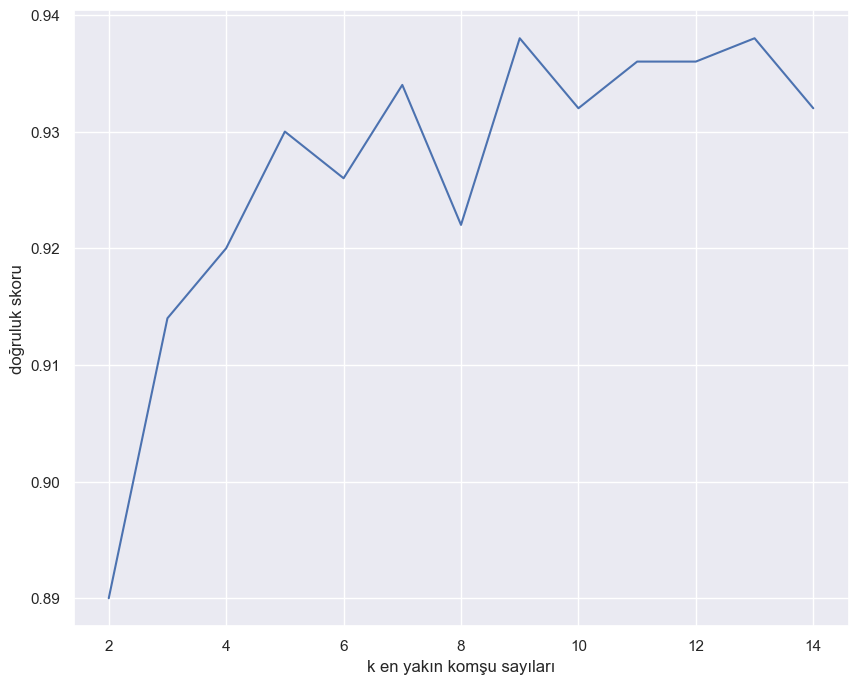

In [59]:
score_list = []

for each in range(2,15,1):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test, y_test))

plt.plot(range(2,15,1),score_list)
plt.xlabel("k en yakın komşu sayıları")
plt.ylabel("doğruluk skoru")
plt.show()

In [60]:
knn_tuned = KNeighborsClassifier(9)
knn_tuned = knn_tuned.fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.938

In [61]:
BataryaGucu = 2500
Bluetooth = 1
MikroislemciHizi = 2.2
CiftHat = 0
OnKameraMp = 5
DortG = 0
DahiliBellek = 32
Kalinlik = 0.9
Agirlik = 120
CekirdekSayisi = 4
ArkaKameraMp = 12
CozunurlukYükseklik = 900
CozunurlukGenislik = 1200
RAM = 3000
BataryaOmru = 12
UcG = 0
Dokunmatik = 0
WiFi = 0
knn_tuned.predict([[BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMp,DortG,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMp,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,UcG,Dokunmatik,WiFi]])

array([1])

In [55]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)
cross_val_score(knn_tuned, X_test, y_test, cv = 10).mean()

[[114   8   4   0]
 [  5 116   0   0]
 [  3   0 109   7]
 [  0   0   4 130]]


0.9020000000000001

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       126
           1       0.94      0.96      0.95       121
           2       0.93      0.92      0.92       119
           3       0.95      0.97      0.96       134

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500

